In [2]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn-v0_8-talk')

#                           Sinx Graph (2D)
```js
        Look 'g.png' from this same Matplotlib Folder. This is how we create Sinx Graph, on the X axis the 'Degrees', on the Y axis the 'Sin() values of the Degrees'. So np.sin() should take an array of 'Degrees'? But it takes 'Radians'.

                                           np.pi
                        Radian = Degree * -------
                                            180

        1 Half Cycle is 180 Degree i.e. starts from 0 Degree and ends at 0 Degree, so

                                           np.pi
                        Radian = 180    * -------    = np.pi
                                            180
        
        So if we want 3 half cycle, then on the X axis the values = np.arange(0, np.pi * 3, 0.1). 0.1 because we dont want 'Spiky' Sinx Graph(which we can achieve by 1), we want Smooth Curvy(just like in the g.png) Graph.
```

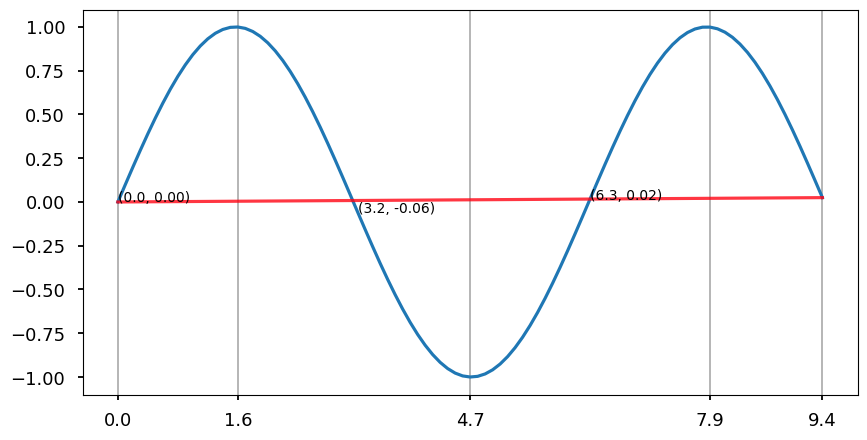

In [19]:
def find_x_sinx(x_sinx) -> list :
    """
    What's the point of all this code? Just find the x values for whose their sinx values are 1 or -1 by round(sinx, 1).
    Ans : after np.sin(..), you will have values like [ 0.9874716492473, 0.9977678784, 0.999644890 ], their round(sinx, 1(/2) are
          all 1, but we need only one 1 here from these 3 values. Also sometimes round(sinx, 2) won't give you 0 for idk like
          0.002387809 but it should give 0. So that's the best method would be the way this function implemented : Find the LAST
          INCREASING POINT from a INCREASING INPUTS AND find the LAST DECREASING POINT from a DECREASING INPUTS.
    """
    increasing, x_ticks, sinx_values = True, [x_sinx[0][0]], [x_sinx[0][1]]

    for i, (x, sinx) in enumerate(x_sinx[:-1]):
        if increasing and (sinx - x_sinx[i+1][1]) > 0.0000001:
            x_ticks.append(x)
            sinx_values.append(sinx)
            increasing = False
        elif increasing == False and (x_sinx[i+1][1] - sinx) > 0.0000001:
            x_ticks.append(x)
            sinx_values.append(sinx)
            increasing = True
            
    x_ticks.append(x_sinx[-1][0])
    sinx_values.append(x_sinx[-1][1])
    return x_ticks, sinx_values

x = np.arange(0, np.pi * 3, 0.1)
xsinx = np.sin(x)
x_sinx = list(zip(x, xsinx))
x_ticks, sinx_values = find_x_sinx(x_sinx)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, xsinx)    # The main plot of SinX graph.
ax.set_xticks(x_ticks, map(lambda v: f"{v:.1f}", x_ticks))
ax.grid(axis='x')

# A red line
ax.plot([x[0], x[-1]], [xsinx[0], xsinx[-1]], color='#ff0313', alpha=0.8)

# annotate those (x, sinx) values who are the FIRST VALUE of Positive Section or Negative Section.
prevSign = 0 # negative
for (x, y) in x_sinx:
    curSign = y >= 0
    if curSign != prevSign:
        ax.text(x, y, s=f"({x:.1f}, {y:.2f})")
        prevSign = curSign

```js
        Instead of Half Cycle, how many 'Full Cycle' we want?

        A Full Cycle is 360 Degree. So,

                                           np.pi
                        Radian = 360    * -------    = 2 * np.pi
                                            180
        
        So if we want two Full Cycles, then on the X axis the values = np.arange(0, '(2 * np.pi)' * 2, 0.1)
        
'Warning' : So before plotting, first see the graph and determine how many "Half/Full/Any_other_quarter Cycle" you want to plot, then find the Radian.
```

[0.0, 0.1, 0.199, 0.296, 0.389, 0.479, 0.565, 0.644, 0.717, 0.783, 0.841, 0.891, 0.932, 0.964, 0.985, 0.997, 1.0, 0.992, 0.974, 0.946, 0.909, 0.863, 0.808, 0.746, 0.675, 0.598, 0.516, 0.427, 0.335, 0.239, 0.141, 0.042, -0.058, -0.158, -0.256, -0.351, -0.443, -0.53, -0.612, -0.688, -0.757, -0.818, -0.872, -0.916, -0.952, -0.978, -0.994, -1.0, -0.996, -0.982, -0.959, -0.926, -0.883, -0.832, -0.773, -0.706, -0.631, -0.551, -0.465, -0.374, -0.279, -0.182, -0.083, 0.017, 0.117, 0.215, 0.312, 0.405, 0.494, 0.578, 0.657, 0.729, 0.794, 0.85, 0.899, 0.938, 0.968, 0.988, 0.999, 0.999, 0.989, 0.97, 0.941, 0.902, 0.855, 0.798, 0.734, 0.663, 0.585, 0.501, 0.412, 0.319, 0.223, 0.124, 0.025, -0.075, -0.174, -0.272, -0.366, -0.458, -0.544, -0.625, -0.7, -0.768, -0.828, -0.88, -0.923, -0.957, -0.981, -0.995, -1.0, -0.995, -0.979, -0.954, -0.919, -0.875, -0.823, -0.762, -0.694, -0.618, -0.537, -0.45, -0.358, -0.263, -0.166, -0.066]


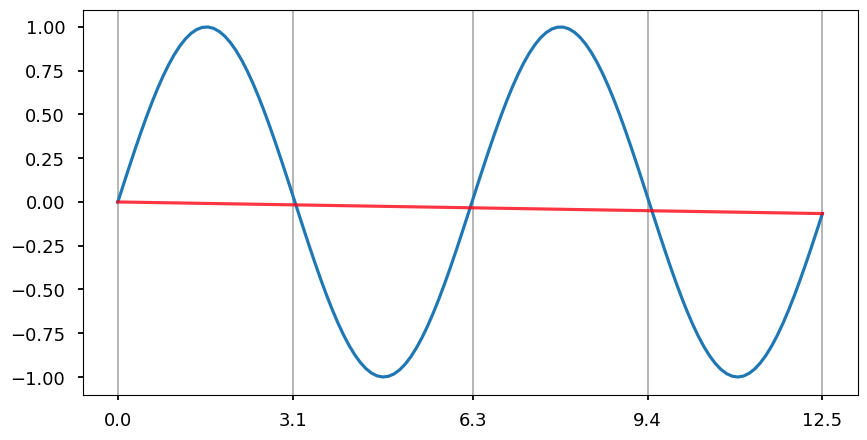

In [15]:
x = np.arange(0, (2 * np.pi) * 2, 0.1)
xsinx = np.sin(x)
print(list(map(lambda v : round(v, 3), xsinx)))

x_ticks = [x for (x, sinx) in zip(x, xsinx) if round(sinx, 1) == 0] + [x[-1]]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, xsinx)
ax.plot([x[0], x[-1]], [xsinx[0], xsinx[-1]], color='#ff0313', alpha=0.8)
ax.set_xticks(x_ticks, map(lambda v: f"{v:.1f}", x_ticks))
ax.grid(axis='x')

#                                                   Cosx Graph (2D)
```js
        The way we created Graph in Sinx section, we will apply here the same tecnnique to find the 'Radian'.
```

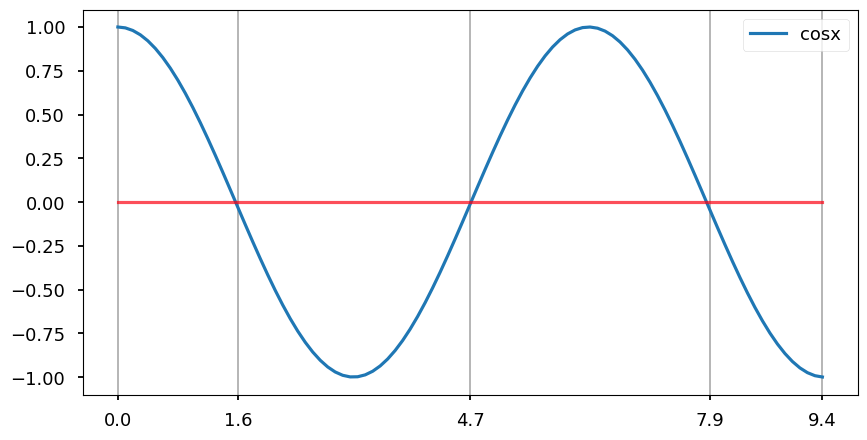

In [24]:
cycle = (np.pi / 180) * 270 # Look "h.png" from this same Matplotlib folder.

x = np.arange(0, cycle * 2, 0.1)
xcosx = np.cos(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, xcosx, label='cosx')

x_ticks = [x[0]] + [x for (x, cosx) in zip(x, xcosx) if round(cosx, 1) == 0] + [x[-1]] # First Point + All 0 points + Last Point.
ax.set_xticks(x_ticks, x_ticks)
ax.grid(axis='x')
ax.plot(x[[0, -1]], [0, 0], color='#fc0313', alpha=0.7)
# ax.axhline(y=0, xmin=0.045, xmax=0.953, color='#fc0313', alpha=0.7)
ax.legend()

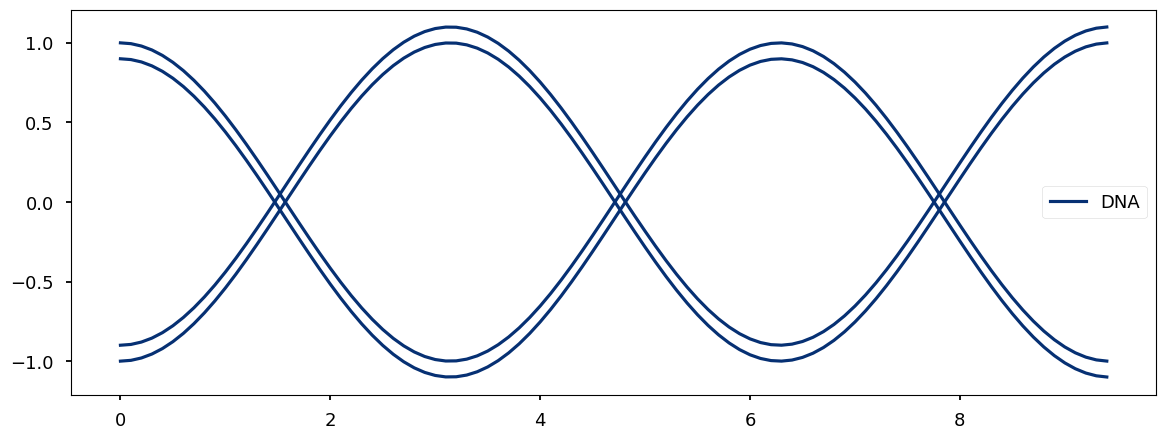

In [23]:
cycle = (np.pi / 180) * 270 # Look "h.png" from this same Matplotlib folder.

x = np.arange(0, cycle * 2, 0.1)
xcosx_positive = np.cos(x)
xcosx_negative = -xcosx_positive

xcosx_positive_3less = xcosx_positive - 0.1
xcosx_negative_3more = xcosx_negative + 0.1

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(x, xcosx_positive, c='#063073', label="DNA")
ax.plot(x, xcosx_negative, c='#063073')

ax.plot(x, xcosx_positive_3less, c='#063073')
ax.plot(x, xcosx_negative_3more, c='#063073')

ax.legend()
plt.show()

#                                                   Tanx Graph (2D)
```js
        NO, the way we created Graph in Sinx section, we WONT apply here the same tecnnique to find the 'Radian'.

        Degree =  0   30   45   60    90
        Sinx   =  0  .50  .71  .87    1
        Tanx   =  0  .58    1  1.73   ∞

        So tanx values are increasing quite rapidly compared to sinx. For LESS 'x' values we can get cool sinx graph as the values are like [0.23786, 0.3456, 0.39879 ..] but tanx is not like this; thats why to get a eye-soothing, curvy tanx graph, we need to have more 'x' values to get tanx values like [0.23786, 0.3456, 0.39879 ..] (put 0.02 instead of 0.1 for 'x' values).
```

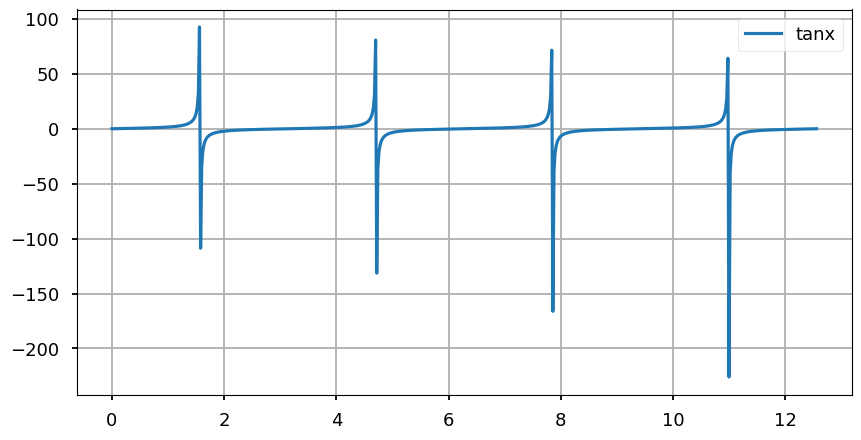

In [58]:
cycle = (np.pi / 180) * 180
x = np.arange(0, cycle * 4, 0.02)
xtanx = np.tan(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, xtanx, label='tanx')
ax.grid()
ax.legend()
# [round(v, 4) for v in xtanx]

#                                               Sinx Cosx Graph (3D)
```js
        What is 3D PLot?
        ----------------
        
        If you draw the sinx graph in 3dplot(), you will see the same 2D Sinx Graph lying on the ground (see the below output's 1st Figure'). This sinx graph plotted by connecting the Points, right? What if we take each (x, y) point from the ground and give them a HEIGHT(z axis)? (see the below output's 3rd Figure'). This is 3D Plot.

        Summary : Draw the 2D Plot in 3D environment(the first figure) and then give each (x, y) point a Height(z).

```

Text(0.5, 0.92, 'y = sinx, z = cosx')

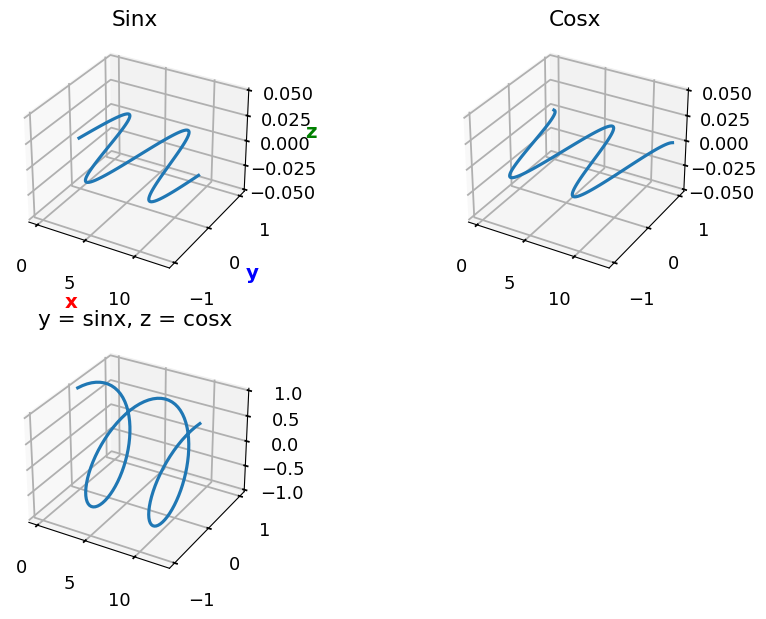

In [106]:
cycle = (np.pi / 180) * 360
x = np.arange(0, cycle * 2, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)
z  = np.cos(x)

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.plot(x, y1) # x, y axis are the Ground here. Haven't put 'z' axis yet.
ax1.set_title("Sinx")
ax1.set_xlabel('x', c='red', labelpad=8, fontweight='bold')
ax1.set_ylabel('y', c='blue', labelpad=8, fontweight='bold')
ax1.set_zlabel('z', c='green', labelpad=8, fontweight='bold')

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.plot(x, y2)
ax2.set_title("Cosx")

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.plot(x, y1, z) # with z axis.
ax3.set_title("y = sinx, z = cosx")

```js
        How the above last figure created?
        ----------------------------------

        >>> np.cos(np.linspace(0, 10, 10))
            array([ 1.        ,  0.44366602, -0.60632092, -0.981674  , -0.26474988,
                    0.74675295,  0.9273677 ,  0.07613012, -0.859815  , -0.83907153])

                    1 -> -0.9 -> 0.9 -> -0.85  (This is how its created)
```

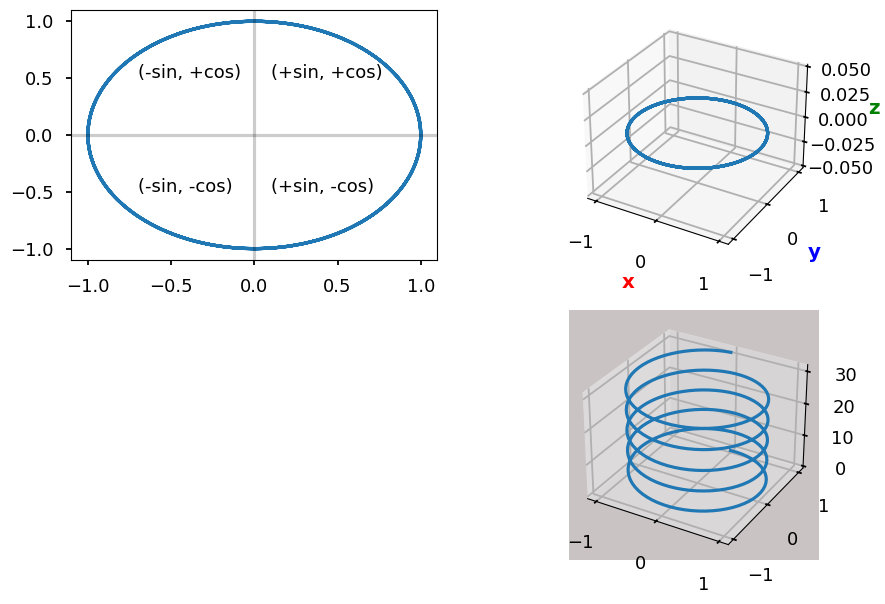

0.00(0  ) : Sin = 0.00 Cos = 1.00
0.52(30 ) : Sin = 0.50 Cos = 0.87
1.05(60 ) : Sin = 0.87 Cos = 0.50
1.57(90 ) : Sin = 1.00 Cos = 0.00
2.09(120) : Sin = 0.87 Cos = -0.50
2.62(150) : Sin = 0.50 Cos = -0.87
3.14(180) : Sin = 0.00 Cos = -1.00
3.67(210) : Sin = -0.50 Cos = -0.87
4.19(240) : Sin = -0.87 Cos = -0.50
4.71(270) : Sin = -1.00 Cos = -0.00
5.24(300) : Sin = -0.87 Cos = 0.50
5.76(330) : Sin = -0.50 Cos = 0.87
6.28(360) : Sin = -0.00 Cos = 1.00


In [3]:
cycle = (np.pi / 180) * 180
z = np.arange(0, cycle * 10, 0.1)
x = np.sin(z)
y = np.cos(z)

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(x, y)                          # Plotting the 2D plot in 2D projection.
ax1.axhline(y=0, c='black', alpha=0.2)
ax1.axvline(x=0, c='black', alpha=0.2)
ax1.text(0.1, 0.5, "(+sin, +cos)", fontsize=13)
ax1.text(0.1, -0.5, "(+sin, -cos)", fontsize=13)
ax1.text(-0.7, -0.5, "(-sin, -cos)", fontsize=13)
ax1.text(-0.7, 0.5, "(-sin, +cos)", fontsize=13)

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.plot(x, y)                          # Plotting the 2D plot in 3D projection.
ax2.set_xlabel('x', c='red', labelpad=10, fontweight='bold')
ax2.set_ylabel('y', c='blue', labelpad=10, fontweight='bold')
ax2.set_zlabel('z', c='green', labelpad=10, fontweight='bold')

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.plot(x, y, z)                       # Plotting the 3D plot in 3D projection.
ax4.set_facecolor('#c9c3c4')

plt.show()

# The first Q : How this ellipse created. The below code will show you for 0 to 360, all the variation of (sinx, cosx) : (+, +),
# (+, -), (-, +), (-, -) which made the ellipse. In 'z' there are lot of values i.e. lot of circles stacked, resulting the Spring
# shape in the 3D plot.
for theta in range(0, 361, 30):
    t = str(theta) + ' ' * (3 - len(str(theta)))
    rad = (np.pi / 180) * theta
    print(f"{rad:.2f}({t}) : Sin = {np.sin(rad):.2f} Cos = {np.cos(rad):.2f}")

In [55]:
import pandas as pd

s = pd.Timestamp("2025-01-22 07:07 PM") - pd.Timedelta('33m')
e = pd.Timestamp("2025-01-23 12:12 AM")
n = (e - s).seconds // 3600

for i in range(0, n+1):
    print((s + pd.Timedelta(f'{i}h{i}m')).strftime("%I:%M"))

06:34
07:35
08:36
09:37
10:38
11:39


In [7]:
"gently wrapped the half quilt around you and brought you to me where you BELONG".replace('', '-').replace(' ', '').strip('-')

('g-e-n-t-l-y--w-r-a-p-p-e-d--t-h-e--h-a-l-f--q-u-i-l-t--a-r-o-u-n-d--y-o-u--a-n-d--b-r-o-u-g-h-t--y-o-u--t-o--m-e--w-h-e-r-e--y-o-u--B-E-L-O-N-G',
 'I missed you, My Sweet Cherry')

In [1]:
"AFFECTIONATELY".replace('', '-').replace(' ', '').strip('-')

'A-F-F-E-C-T-I-O-N-A-T-E-L-Y'